### Manipulation of Trans Proteomic Pipeline (TPP) Comet database search results of *Prochlorococus MED4* LC-MS/MS data using python.

Starting with: 

- Comet output (.xlxs and .csv) of PTM-optimized database searches, sorted by XCorr (descending)

Goal:

- Files with stripped (no PTMs or tryptic ends) peptide lists and
- Columns with #'s of each modification in every sequence
- Column with stripped peptide lengths (# amino acids)

For technical duplicates, I exported Comet search results as both Excel files and as CSVs into my ETNP 2017 git repo:

In [1]:
cd /home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/

/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP


In [2]:
ls

 RAL4_MED2_trypsin_1_PTMopt_Comet.csv
'RAL4_MED2_trypsin_1_PTMopt_Comet_stripped>2.5'
 RAL4_MED2_trypsin_1_PTMopt_Comet_stripped.csv
 RAL4_MED2_trypsin_1_PTMopt_Comet_stripped_work.ods
 RAL4_MED2_trypsin_1_PTMopt_Comet.xlsx
 RAL4_MED2_trypsin_1_PTMopt_PepProp90.csv
 RAL4_MED2_trypsin_1_PTMopt_PepProp90_stripped.csv
 RAL4_MED2_trypsin_1_PTMopt_PepProp90_stripped_peptides
 RAL4_MED2_trypsin_1_PTMopt_PepProp90.xlsx
 RAL4_MED2_trypsin_2_PTMopt_Comet.csv
'RAL4_MED2_trypsin_2_PTMopt_Comet_stripped>2.5.csv'
 RAL4_MED2_trypsin_2_PTMopt_Comet_stripped.csv
 RAL4_MED2_trypsin_2_PTMopt_Comet_stripped_work.ods
 RAL4_MED2_trypsin_2_PTMopt_Comet.xlsx
 RAL4_MED2_trypsin_2_PTMopt_PepProp90.csv
 RAL4_MED2_trypsin_2_PTMopt_PepProp90_stripped.csv
 RAL4_MED2_trypsin_2_PTMopt_PepProp90_stripped_peptides
 RAL4_MED2_trypsin_2_PTMopt_PepProp90.xlsx


In [3]:
#import pandas library for working with tabular data
import os
os.getcwd()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import regular expresson (regex)
import re
#check pandas version
pd.__version__

'1.0.5'

In [4]:
#read the CSV into a datadrame we name 'comet' using the pandas read_csv function
comet = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/RAL4_MED2_trypsin_1_PTMopt_Comet.csv")


#look at the dataframe
comet.head()

,spectrum,xcorr,deltacn,expect,ions,peptide,protein,calc_neutral_pep_mass
0,022016_RAL4_95_MED2_trypsin_1.41211.41211.4,8.768,1,1.42E-09,22/156,K.LFADENHLSPAVTAIQIEDIDAEQFRK.N,PMM0035,3069.5407
1,022016_RAL4_95_MED2_trypsin_1.32793.32793.4,8.578,1,9.31E-10,18/204,K.LAIDDSSIN[115.03]LDQVDYIN[115.03]AHGTSTTANDK...,PMM1609,3735.7599
2,022016_RAL4_95_MED2_trypsin_1.50751.50751.4,8.469,0.646,3.43E-14,24/156,R.SGLQNAASIAGM[147.04]VLTTEC[160.03]IVADLPEKK.D,PMM1436,2831.4409
3,022016_RAL4_95_MED2_trypsin_1.31065.31065.3,8.061,0.561,2.18E-11,17/92,K.IDIEDGGIVTIASHDGAAAEEAQK.I,PMM1191,2409.166
4,022016_RAL4_95_MED2_trypsin_1.50278.50278.4,7.949,0.584,3.02E-09,23/156,R.SGLQNAASIAGM[147.04]VLTTEC[160.03]IVADLPEKK.D,PMM1436,2831.4409


The peptide column has the residues before and after the tryptic terminii as well as masses of modified residues (e.g., 160.03 Da for carbamidomethylated cysteine). We want to make new columns with all that information and make a column with only the 'stripped' peptide sequence that's just amino acids - this we can then align against other sequences, for example. 

Modified residues were allowed for:

- fixed carbamodimethylation of cysteine 57.021464 C
- varialbe oxidation of methionine: 15.9949 M
- variable deamidation of asparagine, glumatine: 0.984016 NQ
- variable iron cation on lysine: 54.010565 K
- variable methylation of lysine and arginine: 14.015650 KR

We'll then write this manipulated dataframe to a new file.

In [5]:
# use str.strip with indexing by str[0] to add a column with the peptide's left terminus
comet['L terminus'] = comet['peptide'].astype(str).str[0]

# use str.strip with indexing by str[-1] to add a column with the peptide's left terminus
comet['R terminus'] = comet['peptide'].str.strip().str[-1]

# use a count function to enumerate the # of ccarbamidomethylated C's in each peptide
comet['c-carb'] = comet['peptide'].str.count("160.03")

# use a count function to enumerate the # of oxidized M's in each peptide
comet['m-oxid'] = comet['peptide'].str.count("147.04")

# use a count function to enumerate the # of deamidated N's in each peptide
comet['n-deam'] = comet['peptide'].str.count("115.03")

# use a count function to enumerate the # of deamidated Q's in each peptide
comet['q-deam'] = comet['peptide'].str.count("129.04")

# use a count function to enumerate the # of iron adducted K's in each peptide
comet['k-iron'] = comet['peptide'].str.count("182.11")

# use a count function to enumerate the # of methylated K's in each peptide
comet['k-meth'] = comet['peptide'].str.count("142.11")

# use a count function to enumerate the # of methylated R's in each peptide
comet['r-meth'] = comet['peptide'].str.count("170.12")

# create a column with 'stripped' peptide sequences using strip
comet['stripped peptide'] = comet['peptide'].str[2:].str[:-2].str.replace(r"\[.*\]","")

# add a column with the stripped peptide length (number of AAs)
comet['stripped length'] = comet['stripped peptide'].apply(len)

# total the number of modifications in sequence
comet['ptm-total'] = comet['c-carb'] + comet['m-oxid'] + comet['n-deam'] + comet['q-deam'] + comet['k-iron'] + comet['k-meth'] + comet['r-meth']

# total the number of modifications in sequence relative to # of AAs
comet['ptm-norm'] = comet['ptm-total'] / comet['stripped length']

# write modified dataframe to new txt file, same name + 'stripped'
comet.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/RAL4_MED2_trypsin_1_PTMopt_Comet_stripped.csv")


# check out the results
comet.head(20)

,spectrum,xcorr,deltacn,expect,ions,peptide,protein,calc_neutral_pep_mass,L terminus,R terminus,...,m-oxid,n-deam,q-deam,k-iron,k-meth,r-meth,stripped peptide,stripped length,ptm-total,ptm-norm
0,022016_RAL4_95_MED2_trypsin_1.41211.41211.4,8.768,1,1.42E-09,22/156,K.LFADENHLSPAVTAIQIEDIDAEQFRK.N,PMM0035,3069.5407,K,N,...,0,0,0,0,0,0,LFADENHLSPAVTAIQIEDIDAEQFRK,27,0,0.000000
1,022016_RAL4_95_MED2_trypsin_1.32793.32793.4,8.578,1,9.31E-10,18/204,K.LAIDDSSIN[115.03]LDQVDYIN[115.03]AHGTSTTANDK...,PMM1609,3735.7599,K,S,...,0,2,0,0,0,0,LAIDDSSINAHGTSTTANDKNETSAIK,27,2,0.074074
2,022016_RAL4_95_MED2_trypsin_1.50751.50751.4,8.469,0.646,3.43E-14,24/156,R.SGLQNAASIAGM[147.04]VLTTEC[160.03]IVADLPEKK.D,PMM1436,2831.4409,R,D,...,1,0,0,0,0,0,SGLQNAASIAGMIVADLPEKK,21,2,0.095238
3,022016_RAL4_95_MED2_trypsin_1.31065.31065.3,8.061,0.561,2.18E-11,17/92,K.IDIEDGGIVTIASHDGAAAEEAQK.I,PMM1191,2409.166,K,I,...,0,0,0,0,0,0,IDIEDGGIVTIASHDGAAAEEAQK,24,0,0.000000
4,022016_RAL4_95_MED2_trypsin_1.50278.50278.4,7.949,0.584,3.02E-09,23/156,R.SGLQNAASIAGM[147.04]VLTTEC[160.03]IVADLPEKK.D,PMM1436,2831.4409,R,D,...,1,0,0,0,0,0,SGLQNAASIAGMIVADLPEKK,21,2,0.095238
5,022016_RAL4_95_MED2_trypsin_1.26579.26579.3,7.813,0.516,2.22E-05,18/68,R.DKGSLVLLDAC[160.03]QSLAHQK.L,PMM0070,1982.0255,R,L,...,0,0,0,0,0,0,DKGSLVLLDACQSLAHQK,18,1,0.055556
6,022016_RAL4_95_MED2_trypsin_1.50978.50978.4,7.753,0.597,1.82E-08,21/156,R.SGLQNAASIAGM[147.04]VLTTEC[160.03]IVADLPEKK.D,PMM1436,2831.4409,R,D,...,1,0,0,0,0,0,SGLQNAASIAGMIVADLPEKK,21,2,0.095238
7,022016_RAL4_95_MED2_trypsin_1.61470.61470.4,7.744,0.529,1.13E-09,18/156,R.SGLQNAASIAGMVLTTEC[160.03]IVADLPEKK.D,PMM1436,2815.446,R,D,...,0,0,0,0,0,0,SGLQNAASIAGMVLTTECIVADLPEKK,27,1,0.037037
8,022016_RAL4_95_MED2_trypsin_1.61687.61687.4,7.673,0.61,1.77E-11,23/156,R.SGLQNAASIAGMVLTTEC[160.03]IVADLPEKK.D,PMM1436,2815.446,R,D,...,0,0,0,0,0,0,SGLQNAASIAGMVLTTECIVADLPEKK,27,1,0.037037
9,022016_RAL4_95_MED2_trypsin_1.31081.31081.2,7.56,0.629,3.14E-12,15/46,K.IDIEDGGIVTIASHDGAAAEEAQK.I,PMM1191,2409.166,K,I,...,0,0,0,0,0,0,IDIEDGGIVTIASHDGAAAEEAQK,24,0,0.000000


In [19]:
# plotting histograms of PTMs using matplotlib


# use qcut to divide the xcorr data into bins
# comet.plot(x ='xcorr', y='stripped length', kind = 'hist')
# plt.show()


plt.hist(comet[comet["c-carb"]=="1"]["xcorr"].reset_index(drop=True), bins=200, alpha=0.6, label="c-carb")
plt.hist(comet[comet["m-oxid"]=="1"]["xcorr"].reset_index(drop=True), bins=200, alpha=0.6, label="m-oxid")
plt.legend()
plt.show()

TypeError: Invalid comparison between dtype=int64 and str

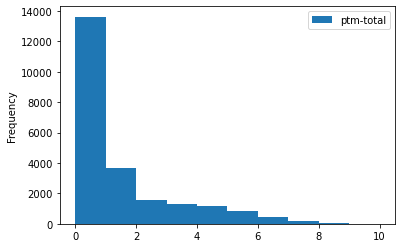

In [17]:
comet.plot(y='ptm-total', kind = 'hist')
plt.show()

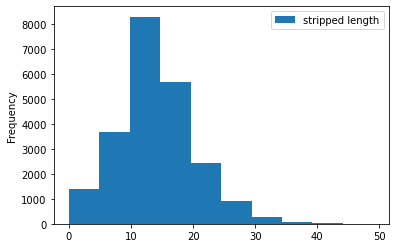

In [18]:
comet.plot(y='stripped length', kind = 'hist')
plt.show()

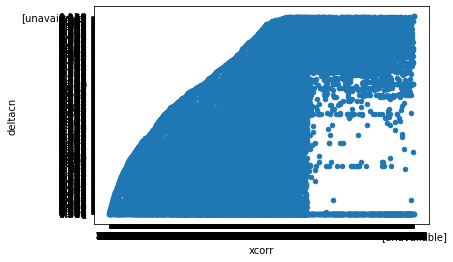

In [13]:
comet.plot(x ='xcorr', y='deltacn', kind = 'scatter')
plt.show()

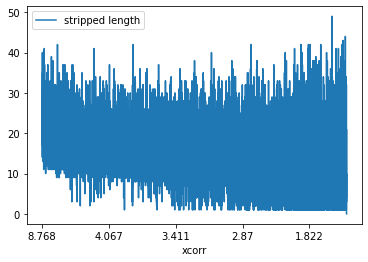

In [20]:
comet.plot(x ='xcorr', y='stripped length', kind = 'line')

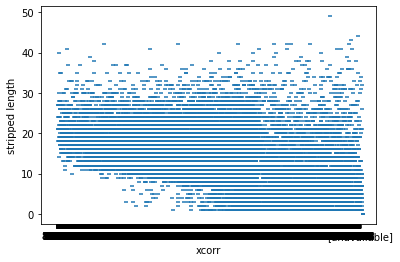

In [23]:
comet.plot(x ='xcorr', y='stripped length', kind = 'scatter', marker=1)
plt.show()

In [24]:
fig, (del, len) = plt.subplots(1, 2)

del.comet.plot(x ='xcorr', y='deltacn', kind = 'scatter')
del.set_title("Delta CN")
del.invert_xaxis()

len.comet.plot(x ='xcorr', y='stripped length', kind = 'scatter', marker=1)
len.set_title("Peptide length")
len.invert_xaxis()

fig.tight_layout()
plt.show()

SyntaxError: invalid syntax (<ipython-input-24-4130c35986cb>, line 1)

Now doing the same manipulation for the duplicate MED2_trypsin injection Comet output:

In [ ]:
#read the CSV into a datadrame we name 'comet' using the pandas read_csv function
comet = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/RAL4_MED2_trypsin_2_PTMopt_Comet.csv")


#look at the dataframe
comet.head()

In [ ]:
# use str.strip with indexing by str[0] to add a column with the peptide's left terminus
comet['L terminus'] = comet['peptide'].astype(str).str[0]

# use str.strip with indexing by str[-1] to add a column with the peptide's left terminus
comet['R terminus'] = comet['peptide'].str.strip().str[-1]

# use a count function to enumerate the # of ccarbamidomethylated C's in each peptide
comet['c-carb'] = comet['peptide'].str.count("160.03")

# use a count function to enumerate the # of oxidized M's in each peptide
comet['m-oxid'] = comet['peptide'].str.count("147.04")

# use a count function to enumerate the # of deamidated N's in each peptide
comet['n-deam'] = comet['peptide'].str.count("115.03")

# use a count function to enumerate the # of deamidated Q's in each peptide
comet['q-deam'] = comet['peptide'].str.count("129.04")

# use a count function to enumerate the # of iron adducted K's in each peptide
comet['k-iron'] = comet['peptide'].str.count("182.11")

# use a count function to enumerate the # of methylated K's in each peptide
comet['k-meth'] = comet['peptide'].str.count("142.11")

# use a count function to enumerate the # of methylated R's in each peptide
comet['r-meth'] = comet['peptide'].str.count("170.12")

# create a column with 'stripped' peptide sequences using strip
comet['stripped peptide'] = comet['peptide'].str[2:].str[:-2].str.replace(r"\[.*\]","")

# add a column with the stripped peptide length (number of AAs)
comet['stripped length'] = comet['stripped peptide'].apply(len)

# write modified dataframe to new txt file, same name + 'stripped'
comet.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/RAL4_MED2_trypsin_2_PTMopt_Comet_stripped.csv")


# check out the results
comet.head()

Now we should have two stripped peptide csvs in the directory:

In [ ]:
ls /home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/